# This is to perform SVM after Factor Analysis


# organzing and loading the data 

In [4]:
# clean the memory 


# loading the library
import numpy as np
import os
import os.path
import scipy.io
from scipy.io import loadmat
import pickle

# Experiment info 
yymmdd = '20201002'
perf_Arrow_hhmmss = list(['145058','145910','150443','151528','152108'])


# finding single trials

ID1 = 0;
ID2 = 0;
ID3 = 0;
ID4 = 0;

Trials_T1 = np.empty((0,128), dtype=float)
Trials_T2 = np.empty((0,128), dtype=float)
Trials_T3 = np.empty((0,128), dtype=float)
Trials_T4 = np.empty((0,128), dtype=float)

# loading the block/session data from the location
for j in range(len(perf_Arrow_hhmmss)):
    
    #print('Session:'+ perf_Arrow_hhmmss[j])
    DataPath =os.path.join('E:','\Bravo1','CursorPlatform','Data_Python',yymmdd,'GangulyServer','RadialTask',perf_Arrow_hhmmss[j],'BCI_Fixed')
    datadir = os.listdir(DataPath)
    
    # loading the trials
    for k in range(len(datadir)):
        
        #print('Trial:',k+1)
        with open(DataPath+'/'+datadir[k], 'rb') as f:
            TrialData = pickle.load(f)
            Fs = TrialData['Params']['Fs']
            
            # to find successful trials
            if (len(TrialData['BroadbandData']['signals'])/Fs) < (TrialData['Params']['MaxReachTime']):
                #print(True)
               
                Bin_Num = TrialData['Params']['ClickCounter']
                ClickTime = Bin_Num*np.round(Fs/(TrialData['Params']['UpdateRate']))
                
                ECoG1 = TrialData['BroadbandData']['signals']
                
                if len(ECoG1) < int(ClickTime)+50:
                    ECoG2 = ECoG1
                else:
                    ECoG2 = ECoG1[(len(ECoG1)-int(ClickTime)):len(ECoG1),:]
                
                # for ERP case use this
                # ECoG3 = ECoG2[0:1000,:];
                #print (ECoG3.shape)
                
                # for including all data use this
                ECoG3 = ECoG2
                
                if TrialData['TargetID'] == 1:
                    ID1 = ID1+1                   
                    Trials_T1 = np.append(Trials_T1, ECoG3, axis=0)

                elif TrialData['TargetID'] == 2:
                    ID2 = ID2+1
                    Trials_T2 = np.append(Trials_T2, ECoG3, axis=0)

                elif TrialData['TargetID'] == 3:
                    ID3 = ID3+1
                    Trials_T3 = np.append(Trials_T3, ECoG3, axis=0)

                elif TrialData['TargetID'] == 4:
                    ID4 = ID4+1
                    Trials_T4 = np.append(Trials_T4, ECoG3, axis=0)
                    
                
            
            
            
print('End of Running Section')       

End of Running Section


In [9]:

Trials_T4.shape

(31968, 128)

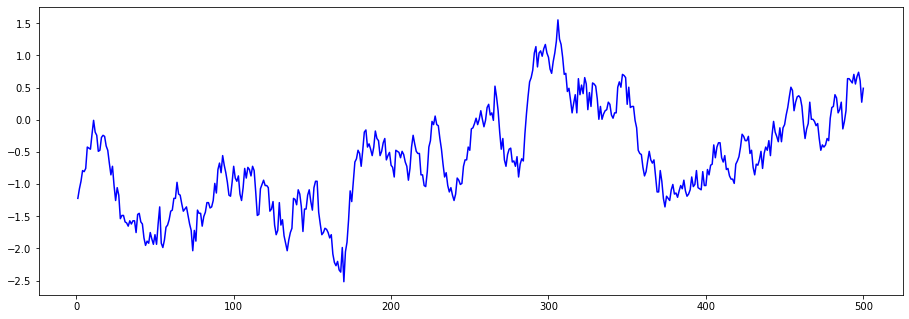

In [11]:
import matplotlib.pyplot as plt
t = np.arange(1,500+1,1)
fig = plt.figure(figsize=(12,4))
ax = fig.add_axes([0,0,1,1])
ax.plot(t,Trials_T4[0:500,0],'b')

# Filtering the signals

In [20]:
from scipy.signal import butter, filtfilt, hilbert
import matplotlib.pyplot as plt


All_Signal = [Trials_T1, Trials_T2, Trials_T3, Trials_T4];

# initilize the values
class structtype():
    pass

HilbertTarget = [ structtype() for i in range(4)]
HilbertTarget[0].feature = [ structtype() for i in range(6)]
HilbertTarget[1].feature = [ structtype() for i in range(6)]
HilbertTarget[2].feature = [ structtype() for i in range(6)]
HilbertTarget[3].feature = [ structtype() for i in range(6)]

for target in range(4):
    print('Target:',target)
    Raw_Signals = All_Signal[target]
    
    # for delta band
    nyq = 0.5 * Fs
    low = 0.5/nyq
    high = 4/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered = filtfilt(b,a,Raw_Signals,axis=0)
    Hil = np.abs(hilbert(Filtered,axis=0))
    HilbertTarget[target].feature[0] = Hil
    
    # for theta band
    nyq = 0.5 * Fs
    low = 4/nyq
    high = 8/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered = filtfilt(b,a,Raw_Signals,axis=0)
    Hil = np.abs(hilbert(Filtered,axis=0))
    HilbertTarget[target].feature[1] = Hil
    
    # for alpha band
    nyq = 0.5 * Fs
    low = 8/nyq
    high = 13/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered = filtfilt(b,a,Raw_Signals,axis=0)
    Hil = np.abs(hilbert(Filtered,axis=0))
    HilbertTarget[target].feature[2] = Hil
    
    # for beta band
    nyq = 0.5 * Fs
    low = 13/nyq
    high = 30/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered = filtfilt(b,a,Raw_Signals,axis=0)
    Hil = np.abs(hilbert(Filtered,axis=0))
    HilbertTarget[target].feature[3] = Hil
    
    # for gamma1 band
    nyq = 0.5 * Fs
    low = 30/nyq
    high = 50/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered = filtfilt(b,a,Raw_Signals,axis=0)
    Hil = np.abs(hilbert(Filtered,axis=0))
    HilbertTarget[target].feature[4] = Hil
    
    # for hg-lfo band
    nyq = 0.5 * Fs
    low = 70/nyq
    high = 150/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered = filtfilt(b,a,Raw_Signals,axis=0)
    Hil1 = np.abs(hilbert(Filtered,axis=0))
    nyq = 0.5 * Fs
    low = 0.5/nyq
    high = 4/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered2 = filtfilt(b,a,Hil1,axis=0)
    Hil2 = Filtered2 + Hil1.mean(0)
    HilbertTarget[target].feature[5] = Hil2
    
print('End of Running Section')   

Target: 0
Target: 1
Target: 2
Target: 3
End of Running Section


(31968, 128)

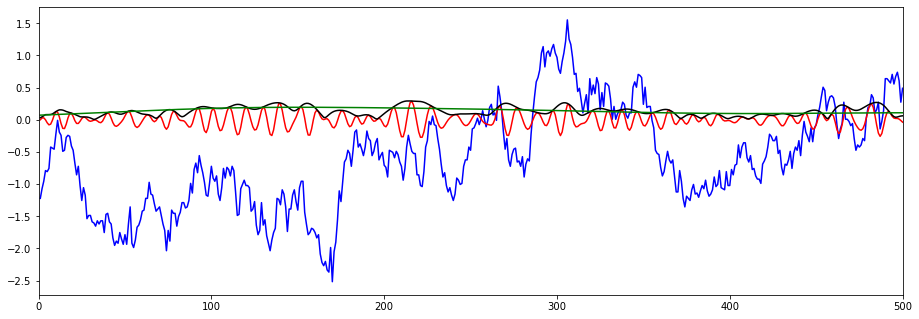

In [21]:
# test the signal
#a, b = Raw_Signals.shape
#t = np.arange(1,a+1,1)
t = np.arange(1,500+1,1)
fig = plt.figure(figsize=(12,4))
ax = fig.add_axes([0,0,1,1])
ax.plot(t,Raw_Signals[0:500,0],'b')
ax.plot(t,Filtered[0:500,0],'r')
ax.plot(t,Hil1[0:500,0],'k')
Forplot = HilbertTarget[3].feature[5]
ax.plot(t,Forplot[0:500,0],'g')
ax.set_xlim([0,500])
#ax.set_ylim([0,2])
Raw_Signals.shape

# ERP of single trials...will work later

# Factor Analysis for concatanated single-trials per targets (will have 4FA)

In [72]:
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer
import pandas as pd

    
# initilize the values
class structtype():
    pass
# for FA signals
FASignalTarget = [ structtype() for i in range(4)]
FASignalTarget[0].feature = [ structtype() for i in range(6)]
FASignalTarget[1].feature = [ structtype() for i in range(6)]
FASignalTarget[2].feature = [ structtype() for i in range(6)]
FASignalTarget[3].feature = [ structtype() for i in range(6)]

# for FA weights
FAWeightTarget = [ structtype() for i in range(4)]
FAWeightTarget[0].feature = [ structtype() for i in range(6)]
FAWeightTarget[1].feature = [ structtype() for i in range(6)]
FAWeightTarget[2].feature = [ structtype() for i in range(6)]
FAWeightTarget[3].feature = [ structtype() for i in range(6)]


for target in range(4):
    print('Target:',target)
    
    for Fe in range(6): 
        #transformer = FactorAnalysis(n_components=10, random_state=0)
        #FASignalTarget[target].feature[Fe] = transformer.fit_transform(HilbertTarget[target].feature[Fe])
        
        fa = FactorAnalyzer(10,rotation=None)
        fa.fit(HilbertTarget[target].feature[Fe])
        FAWeightTarget[target].feature[Fe] = fa.loadings_
        FASignalTarget[target].feature[Fe] = (HilbertTarget[target].feature[Fe]) @ (FAWeightTarget[target].feature[Fe])
        
        


Target: 0
Target: 1
Target: 2
Target: 3


In [73]:
Activation_Signal = FASignalTarget[3].feature[5]
Activation_Signal.shape


(31968, 10)

(31968, 10)

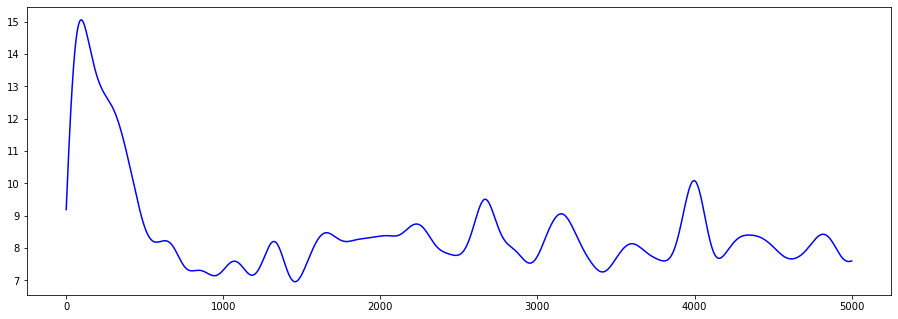

In [74]:
# test the factors
%matplotlib inline
Activation_Signal =(FASignalTarget[3].feature[5])
t = np.arange(1,5000+1,1)
fig = plt.figure(figsize=(12,4))
ax = fig.add_axes([0,0,1,1])
ax.plot(t,Activation_Signal[0:5000,0],'b')
#ax.set_xlim([0,1])
#ax.set_ylim([0,2])

Activation_Signal.shape

In [84]:
# 3D plot for the first 3 FA signals; choose the options 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

%matplotlib qt
#%matplotlib notebook

#choose this option
Fe = 5;
ax = plt.axes(projection='3d')
ax.set_xlabel('Dim1')
ax.set_ylabel('Dim2')
ax.set_zlabel('Dim3')
ax.set_xlim([0,15])
ax.set_ylim([-5,5])
ax.set_zlim([-5,5])

ListMarker = ['blue','red','orange','green']
ListLegend = ['Target1','Target2','Target3','target4']

for target in range(4):
    
    # Data for a three-dimensional line
    Activation_Signal = FASignalTarget[target].feature[Fe]
    xline = Activation_Signal[:,0]
    yline = Activation_Signal[:,1]
    zline = Activation_Signal[:,2]
    ax.plot3D(xline, yline, zline,color=ListMarker[target], label=ListLegend[target])
    
plt.show()
ax.legend(loc=0)




# Performing binary-classifier SVM for pure features or FA signals

In [148]:
q = FASignalTarget[0].feature[5]

In [149]:
q.shape

(43956, 10)

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [267]:
# without FA
#X_T1 = HilbertTarget[1].feature[5]
#X_T2 = HilbertTarget[2].feature[5]

# with FA
X_T1 = FASignalTarget[0].feature[5]
X_T2 = FASignalTarget[1].feature[5]

# balance the data
Indx = min(X_T1.shape[0], X_T2.shape[0])
step = 1
KeepSample = 10000 

X_heldout_T1 = X_T1[(Indx-KeepSample):Indx:step,:]
X_heldout_T2 = X_T2[(Indx-KeepSample):Indx:step,:]

y_heldout_T1 = np.zeros((X_heldout_T1.shape[0],1))
y_heldout_T2 = np.ones((X_heldout_T2.shape[0],1))

X_heldout = np.append(X_heldout_T1, X_heldout_T2, axis=0) 
y_heldout = np.append(y_heldout_T1, y_heldout_T2, axis=0)
# flatten the array
y_heldout =y_heldout.ravel()

X_T1 = X_T1[0:(Indx-KeepSample):step,:]
X_T2 = X_T2[0:(Indx-KeepSample):step,:]

y_T1 = np.zeros((X_T1.shape[0],1))
y_T2 = np.ones((X_T2.shape[0],1))

X = np.append(X_T1, X_T2, axis=0) 
y = np.append(y_T1, y_T2, axis=0)
# flatten the array
y =y.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [268]:
X_T1.shape

(31292, 10)

In [269]:
from sklearn.svm import SVC
model = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
model.fit(X_train,y_train)
SVC

sklearn.svm._classes.SVC

In [270]:
y.shape

(62584,)

In [271]:
predictions = model.predict(X_test)

In [272]:
from sklearn.metrics import classification_report, confusion_matrix

In [273]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test,predictions))

[[10317     0]
 [    0 10336]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10317
         1.0       1.00      1.00      1.00     10336

    accuracy                           1.00     20653
   macro avg       1.00      1.00      1.00     20653
weighted avg       1.00      1.00      1.00     20653



In [274]:
# get support vectors
NumSV = model.support_vectors_
NumSV.shape

(79, 10)

In [275]:
# get indices of support vectors
model.support_

array([ 2668,  2791,  3031,  5588,  7167,  9923, 10815, 11969, 12309,
       12397, 13858, 14457, 14780, 15547, 16642, 16918, 18422, 20374,
       21936, 24079, 24491, 24574, 26287, 26824, 28830, 29379, 29920,
       31357, 31756, 32176, 32594, 32672, 34184, 35971, 38539, 39844,
       41150, 41153, 41457, 41516,  1326,  3046,  4458,  4891,  7004,
        7046,  7203,  7795,  8475,  9820, 11618, 12300, 12335, 13583,
       13627, 14289, 14441, 14550, 15401, 16205, 16310, 17151, 17547,
       17660, 17881, 21820, 22792, 22998, 25376, 29873, 30975, 31109,
       33104, 33823, 34977, 35366, 37901, 41729, 41885])

In [276]:
# get number of support vectors for each class
model.n_support_

array([40, 39])

In [277]:
# testing the held_out data
heldout_predictions = model.predict(X_heldout)
print(confusion_matrix(y_heldout, heldout_predictions))
print('\n')
print(classification_report(y_heldout, heldout_predictions))


[[10000     0]
 [ 1423  8577]]


              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93     10000
         1.0       1.00      0.86      0.92     10000

    accuracy                           0.93     20000
   macro avg       0.94      0.93      0.93     20000
weighted avg       0.94      0.93      0.93     20000



# Parameter adjustment for binary-classifier SVM

In [192]:
from sklearn.model_selection import GridSearchCV

In [193]:
param_grid = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}

In [194]:
grid = GridSearchCV(SVC(),param_grid, verbose=3)

In [195]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=0.1, gamma=1, score=1.000, total=   1.5s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=1.000, total=   1.3s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=1.000, total=   1.4s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=1.000, total=   1.4s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=1.000, total=   1.4s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=1.000, total=   0.8s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=1.000, total=   0.8s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=1.000, total=   0.8s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=1.000, total=   0.8s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] .................... C=10, gamma=0.01, score=1.000, total=   0.1s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=1.000, total=   0.1s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=1.000, total=   0.1s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=1.000, total=   0.1s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=1.000, total=   0.6s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=1.000, total=   0.6s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=1.000, total=   0.6s
[CV] C=10, gamma=0.001 ...............................................
[CV] .

[CV] ................ C=1000, gamma=0.0001, score=1.000, total=   0.3s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=1.000, total=   0.3s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=1.000, total=   0.3s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=1.000, total=   0.3s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=1.000, total=   0.3s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  3.9min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [196]:
grid.best_params_

{'C': 100, 'gamma': 0.01}

In [197]:
grid.best_estimator_

SVC(C=100, gamma=0.01)

In [198]:
grid_predictions = grid.predict(X_test)

In [199]:
print(confusion_matrix(y_test, grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[13640     0]
 [    0 13613]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13640
         1.0       1.00      1.00      1.00     13613

    accuracy                           1.00     27253
   macro avg       1.00      1.00      1.00     27253
weighted avg       1.00      1.00      1.00     27253



# Performing multi-classifier SVM for pure features or FA signals


In [289]:
# without FA
#X_T1 = HilbertTarget[1].feature[5]
#X_T2 = HilbertTarget[2].feature[5]

# with FA
X_T1 = FASignalTarget[0].feature[5]
X_T2 = FASignalTarget[1].feature[5]
X_T3 = FASignalTarget[2].feature[5]
X_T4 = FASignalTarget[3].feature[5]

# balance the data
Indx = min(X_T1.shape[0], X_T2.shape[0],X_T3.shape[0],X_T4.shape[0])
step = 1
KeepSample = 5000 

X_heldout_T1 = X_T1[(Indx-KeepSample):Indx:step,:]
X_heldout_T2 = X_T2[(Indx-KeepSample):Indx:step,:]
X_heldout_T3 = X_T3[(Indx-KeepSample):Indx:step,:]
X_heldout_T4 = X_T4[(Indx-KeepSample):Indx:step,:]

y_heldout_T1 = np.zeros((X_heldout_T1.shape[0],1))
y_heldout_T2 = np.ones((X_heldout_T2.shape[0],1))
y_heldout_T3 = 2*np.ones((X_heldout_T3.shape[0],1))
y_heldout_T4 = 3*np.ones((X_heldout_T4.shape[0],1))

X_heldout = np.concatenate((X_heldout_T1, X_heldout_T2, X_heldout_T3, X_heldout_T4), axis=0) 
y_heldout = np.concatenate((y_heldout_T1, y_heldout_T2, y_heldout_T3, y_heldout_T4), axis=0)
# flatten the array
y_heldout =y_heldout.ravel()

X_T1 = X_T1[0:(Indx-KeepSample):step,:]
X_T2 = X_T2[0:(Indx-KeepSample):step,:]
X_T3 = X_T3[0:(Indx-KeepSample):step,:]
X_T4 = X_T4[0:(Indx-KeepSample):step,:]

y_T1 = np.zeros((X_T1.shape[0],1))
y_T2 = np.ones((X_T2.shape[0],1))
y_T3 = 2*np.ones((X_T3.shape[0],1))
y_T4 = 3*np.ones((X_T4.shape[0],1))

X = np.concatenate((X_T1, X_T2, X_T3, X_T4), axis=0) 
y = np.concatenate((y_T1, y_T2, y_T3, y_T4), axis=0)
# flatten the array
y =y.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [290]:
X_test.shape

(35598, 10)

In [291]:
from sklearn.svm import SVC
model_multi = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
model_multi.fit(X_train,y_train)
SVC

sklearn.svm._classes.SVC

In [292]:
# testing the trainig result
predictions_multiClass = model.predict(X_test)
print(confusion_matrix(y_test, predictions_multiClass))
print('\n')
print(classification_report(y_test, predictions_multiClass))


[[8827    0    0    0]
 [   0 9066    0    0]
 [8892   46    0    0]
 [7330 1437    0    0]]


              precision    recall  f1-score   support

         0.0       0.35      1.00      0.52      8827
         1.0       0.86      1.00      0.92      9066
         2.0       0.00      0.00      0.00      8938
         3.0       0.00      0.00      0.00      8767

    accuracy                           0.50     35598
   macro avg       0.30      0.50      0.36     35598
weighted avg       0.31      0.50      0.36     35598



C:\Users\test\.conda\envs\SVMforLowDim\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Parameter adjustment for multi-classifier SVM

In [296]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}
grid_multi = GridSearchCV(SVC(),param_grid, verbose=3)
grid_multi.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=0.1, gamma=1, score=1.000, total=   2.9s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=1.000, total=   2.8s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.6s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=1.000, total=   2.8s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=1.000, total=   2.8s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=1.000, total=   2.8s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.998, total=   4.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.998, total=   4.4s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.998, total=   4.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.996, total=   4.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] .................... C=10, gamma=0.01, score=0.999, total=   1.6s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=1.000, total=   1.6s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.999, total=   1.6s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.999, total=   1.6s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=1.000, total=   1.6s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.998, total=   4.6s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.998, total=   4.6s
[CV] C=10, gamma=0.001 ...............................................
[CV] .

[CV] ................. C=1000, gamma=0.001, score=1.000, total=   0.8s
[CV] C=1000, gamma=0.001 .............................................
[CV] ................. C=1000, gamma=0.001, score=1.000, total=   0.8s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.999, total=   1.7s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.999, total=   1.7s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.999, total=   1.7s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.999, total=   1.7s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.999, total=   1.8s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 28.0min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [297]:
grid_multi.best_params_

{'C': 1, 'gamma': 1}

In [298]:
predictions_grid_multi = grid_multi.predict(X_test)

In [299]:
print(confusion_matrix(y_test, predictions_grid_multi))
print('\n')
print(classification_report(y_test,predictions_grid_multi))

[[8827    0    0    0]
 [   0 9066    0    0]
 [   0    0 8938    0]
 [   0    0    0 8767]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8827
         1.0       1.00      1.00      1.00      9066
         2.0       1.00      1.00      1.00      8938
         3.0       1.00      1.00      1.00      8767

    accuracy                           1.00     35598
   macro avg       1.00      1.00      1.00     35598
weighted avg       1.00      1.00      1.00     35598



In [300]:
# testing the held_out data
predictions_heldout_multi = grid_multi.predict(X_heldout)
print(confusion_matrix(y_heldout, predictions_heldout_multi))
print('\n')
print(classification_report(y_heldout, predictions_heldout_multi))

[[5000    0    0    0]
 [   0 5000    0    0]
 [   0    0 5000    0]
 [  99  405  258 4238]]


              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      5000
         1.0       0.93      1.00      0.96      5000
         2.0       0.95      1.00      0.97      5000
         3.0       1.00      0.85      0.92      5000

    accuracy                           0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000

